In [1]:
cd  /Users/driscoll/Documents/GitHub/fnc/matlab
FNC_init

[**Demo %s**](#demo-stability-equispaced)

We choose a function over the interval $[0,1]$. Using 7 equally spaced nodes, the interpolation looks fine.

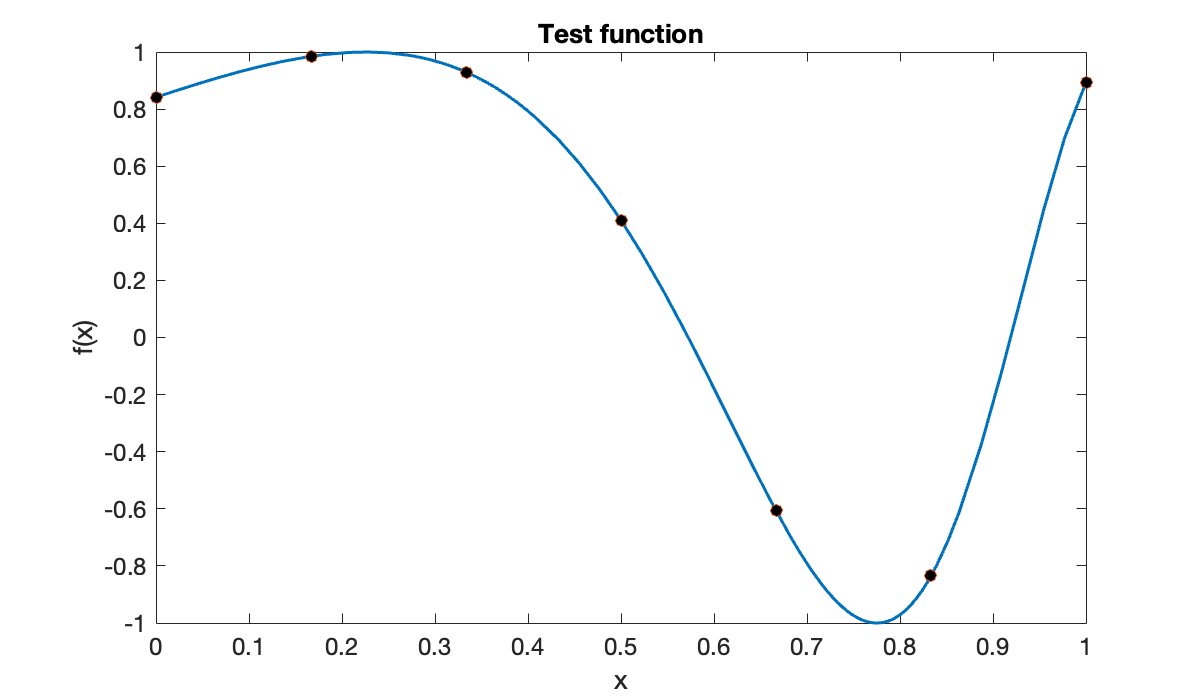

p = function_handle with value:
    @polyinterp/evaluate

The following error was reported evaluating the function in FunctionLine update: Unable to perform assignment because the left and right sides have a different number of elements.


In [2]:
f = @(x) sin(exp(2*x));
clf,  fplot(f, [0, 1], displayname="function")
t = linspace(0, 1, 7);
y = f(t);
hold on,  scatter(t, y, displayname="nodes")
p = polyinterp(t, y)
fplot(p, [0, 1], displayname="interpolant")
xlabel('x'),  ylabel('f(x)') 
title('Test function')    

We want to track the behavior of the error as $n$ increases. We will estimate the error in the continuous interpolant by sampling it at a large number of points and taking the max-norm.

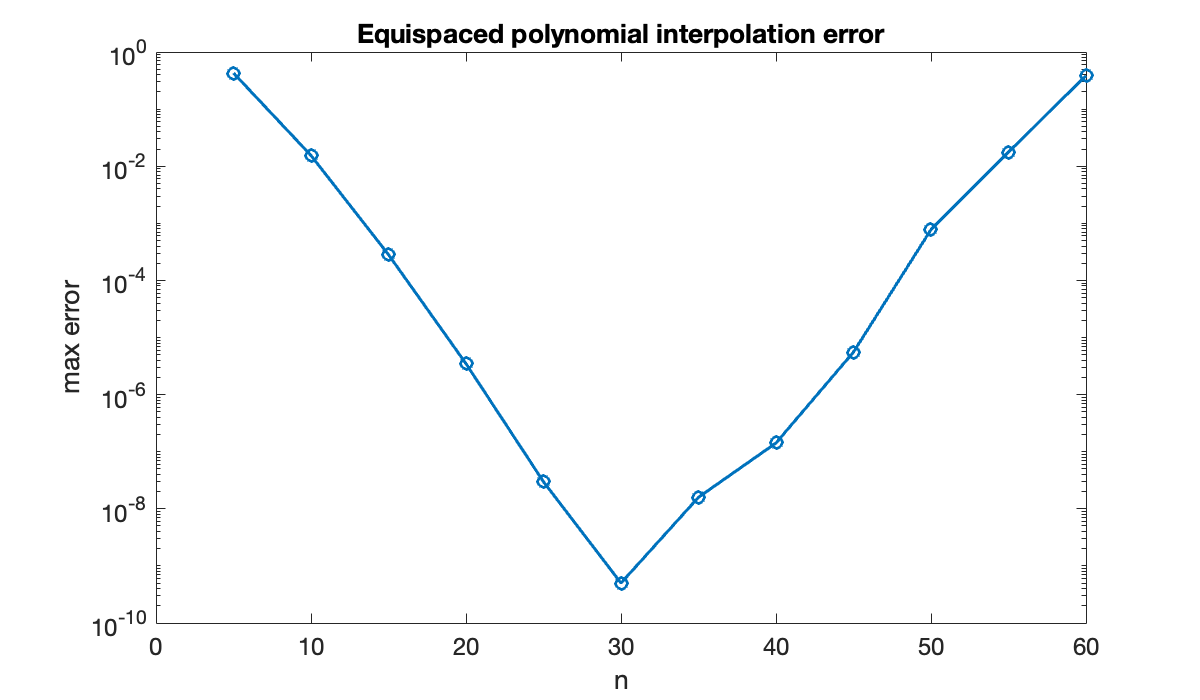

In [3]:
n = (5:5:60)';   
err = zeros(size(n));
x = linspace(0, 1, 1001)';         % for measuring error
for k = 1:length(n) 
  t = linspace(0, 1, n(k) + 1)';     % equally spaced nodes
  y = f(t);                      % interpolation data
  p = polyinterp(t, y);
  err(k) = norm(f(x) - p(x), Inf);
end
clf,  semilogy(n, err, 'o-')
xlabel('n'),  ylabel('max error')   
title('Equispaced polynomial interpolation error')   

The error initially decreases as one would expect but then begins to grow. Both phases occur at rates that are exponential in $n$, i.e., $O(K^n$) for a constant $K$, appearing linear on a semi-log plot.